# Introducción a pandas

Pandas es un paquete de Python que proporciona estructuras de datos similares a los dataframes de R. Pandas depende de Numpy, la librería que añade un potente tipo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:

    Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas.

    Series temporales.

Pandas proporciona herramientas que permiten:

    Leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5

    Seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas

    Fusionar y unir datos

    Transformar datos aplicando funciones tanto en global como por ventanas

    Manipulación de series temporales

    Hacer gráficas

En pandas existen tres tipos básicos de objetos todos ellos basados a su vez en Numpy:

Series (listas, 1D), DataFrame (tablas, 2D) y Panels (tablas 3D).

Revisar otros tutoriales: 

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

https://bioinf.comav.upv.es/courses/linux/python/pandas.html

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Lectura de un dataset (CSV), y almancenamiento en la variable "d"
d = pd.read_csv("/content/drive/MyDrive/Clases 2023-01/Programación Concurrente y Distribuida/Semana 2-3/Introducción a Python/Data/sampledata.csv")

## Comandos y operaciones principales de Pandas

In [13]:
# Visualización de los primeros y últimos 5 elementos
d

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50
...,...,...,...,...,...,...,...,...,...,...
995,996,Jean,Payne,jpaynern@bluehost.com,Mexico,191.211.230.212,-92.89380,16.21790,40,0.30
996,997,Michelle,Murphy,mmurphyro@senate.gov,Croatia,129.124.79.138,15.85000,45.78333,87,0.54
997,998,Joseph,Hill,jhillrp@princeton.edu,Japan,161.176.64.135,139.80000,36.41667,50,0.57
998,999,Roger,Harrison,rharrisonrq@gizmodo.com,Poland,7.194.73.231,20.37415,49.84485,18,0.37


In [9]:
# Ver el tipo de variable de los dataframes de Pandas
type(d)

pandas.core.frame.DataFrame

In [10]:
# Con iloc se puede extraer sólo partes particulares deseadas del dataframe
d.iloc[1:10,3:4]

,email
1,abishop1@mtv.com
2,vrodriguez2@so-net.ne.jp
3,jstanley3@abc.net.au
4,jgutierrez4@shinystat.com
5,nlittle5@latimes.com
6,tfox6@squarespace.com
7,jparker7@gnu.org
8,kwalker8@nba.com
9,wbrown9@boston.com


In [12]:
# Mostrar estadísticas básicas para las variables numéricas
d.describe()

,id,longitude,latitude,score
count,1000.000000,999.000000,999.000000,1000.000000
mean,500.500000,46.831119,24.273880,0.501290
std,288.819436,70.556083,24.272596,0.103403
min,1.000000,-149.333330,-53.787690,0.180000
25%,250.750000,7.046050,8.135695,0.430000
50%,500.500000,42.174440,29.819050,0.510000
75%,750.250000,112.349640,43.186925,0.570000
max,1000.000000,175.496340,72.786840,0.830000


In [14]:
# Acceder a un sólo elemento del dataframe
d.iloc[2,2]

'Rodriguez'

In [15]:
# Acceder a registros seleccionados con todas las columnas
d.iloc[[1,3,5],]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30


In [17]:
# Seleccionar los primeros diez registros, luego seleccionar solamente 3 columnas
d.iloc[range(10),][["last_name", "country", "score"]]

,last_name,country,score
0,Sims,Armenia,0.62
1,Bishop,China,0.22
2,Rodriguez,Portugal,0.33
3,Stanley,China,0.64
4,Gutierrez,Poland,0.50
5,Little,Panama,0.30
6,Fox,Iran,0.33
7,Parker,China,0.55
8,Walker,Slovenia,0.50
9,Brown,Ethiopia,0.41


In [19]:
# Filtrar el dataset para sólo obtener edades iguales a 44 años
d[d.age=='44']

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
169,170,Jason,Stevens,jstevens4p@foxnews.com,Czech Republic,105.101.112.178,16.11480,50.26742,44,0.54
188,189,Ruby,Gonzales,rgonzales58@pbs.org,Portugal,122.247.105.164,-8.91670,38.70000,44,0.58
251,252,Deborah,Patterson,dpatterson6z@salon.com,Palau,177.16.160.109,134.71725,8.08228,44,0.61
337,338,Todd,Henderson,thenderson9d@latimes.com,Indonesia,4.45.250.25,113.48740,-8.28670,44,0.53
473,474,Nicholas,Scott,nscottd5@samsung.com,Russia,165.111.40.207,104.24940,56.70320,44,0.37
550,551,Kathy,Burke,kburkefa@pen.io,Indonesia,197.17.149.125,115.11730,-8.46090,44,0.73
706,707,Kathryn,Mitchell,kmitchelljm@boston.com,Azerbaijan,113.1.57.57,50.04002,40.56441,44,0.66
723,724,Aaron,Chapman,achapmank3@mayoclinic.com,Indonesia,59.111.140.158,106.02910,-6.74290,44,0.39
843,844,Diana,Bennett,dbennettnf@wikipedia.org,Cuba,147.157.224.46,-74.15181,20.24673,44,0.46


In [20]:
# Ver el tipo de datos almacenados en una columna: dtype('O') para Objetos o Strings
d['age'].dtype

dtype('O')

In [21]:
# Filtrar el dataset para obtener los registros cuando las edades son de 55 o 44 años
d[np.logical_or(d.age=="55", d.age=="44")]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
18,19,Jimmy,Robertson,jrobertsoni@thetimes.co.uk,Tajikistan,184.90.118.60,68.44668,37.56702,55,0.60
72,73,Michael,Powell,mpowell20@youtube.com,China,232.233.196.224,120.21400,27.32734,55,0.59
169,170,Jason,Stevens,jstevens4p@foxnews.com,Czech Republic,105.101.112.178,16.11480,50.26742,44,0.54
188,189,Ruby,Gonzales,rgonzales58@pbs.org,Portugal,122.247.105.164,-8.91670,38.70000,44,0.58
251,252,Deborah,Patterson,dpatterson6z@salon.com,Palau,177.16.160.109,134.71725,8.08228,44,0.61
266,267,Gerald,Butler,gbutler7e@google.fr,Philippines,149.199.214.71,121.41470,14.12840,55,0.55
337,338,Todd,Henderson,thenderson9d@latimes.com,Indonesia,4.45.250.25,113.48740,-8.28670,44,0.53
367,368,Philip,Harvey,pharveya7@wsj.com,Portugal,188.30.85.41,-8.16630,37.86690,55,0.18
381,382,Joan,Oliver,joliveral@chicagotribune.com,Russia,98.144.120.116,38.40172,54.03481,55,0.37


In [22]:
# Seleccionar un conjunto de registros del 0 al 9
d.iloc[range(10),]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,0.33
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,0.55
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,no disponible,0.50
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,0.41


In [23]:
# Verificar que el tipo de variable sigue siendo dataframe
type(d.iloc[range(10),])

pandas.core.frame.DataFrame

In [24]:
# Obtener sólo una columna como una Serie
d.age

0       44
1       90
2       39
3      NaN
4       14
      ... 
995     40
996     87
997     50
998     18
999     83
Name: age, Length: 1000, dtype: object

In [25]:
# Ver tipo de dato, ahora ya no es dataframe, sinó una serie
type(d.age)

pandas.core.series.Series

In [ ]:

d["score"].dtype, d['age'].dtype

(dtype('float64'), dtype('O'))

In [26]:
# Crear una nueva columna llamada "scoretimes2", que será la columna score multiplicada por 2
d["scoretimes2"] = d["score"]*2

In [27]:
# Visualizar los primeros 10 elementos, ahora con la nueva columna al final (scoretimes2)
d.head(10)

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62,1.24
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22,0.44
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33,0.66
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64,1.28
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50,1.00
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30,0.60
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,0.33,0.66
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,0.55,1.10
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,no disponible,0.50,1.00
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,0.41,0.82


In [28]:
# Obtener los nombres de las columnas
d.columns

Index(['id', 'first_name', 'last_name', 'email', 'country', 'ip_address',
       'longitude', 'latitude', 'age', 'score', 'scoretimes2'],
      dtype='object')

In [29]:
# Ver las estadísticas básicas, ahora se puede ver la nueva columna
d.describe()

,id,longitude,latitude,score,scoretimes2
count,1000.000000,999.000000,999.000000,1000.000000,1000.000000
mean,500.500000,46.831119,24.273880,0.501290,1.002580
std,288.819436,70.556083,24.272596,0.103403,0.206805
min,1.000000,-149.333330,-53.787690,0.180000,0.360000
25%,250.750000,7.046050,8.135695,0.430000,0.860000
50%,500.500000,42.174440,29.819050,0.510000,1.020000
75%,750.250000,112.349640,43.186925,0.570000,1.140000
max,1000.000000,175.496340,72.786840,0.830000,1.660000


In [30]:
# Generar la matriz de correlaciones, se realizará automáticamente sobre las columnas numéricas
d.corr()

,id,longitude,latitude,score,scoretimes2
id,1.000000,0.003941,-0.045643,-0.007075,-0.007075
longitude,0.003941,1.000000,-0.022150,0.004596,0.004596
latitude,-0.045643,-0.022150,1.000000,-0.016692,-0.016692
score,-0.007075,0.004596,-0.016692,1.000000,1.000000
scoretimes2,-0.007075,0.004596,-0.016692,1.000000,1.000000


In [31]:
# Crear una fila con datos
row = pd.DataFrame([[-21, "Pepe", "Sonora", "ps@ps.com", "Colombia", None, -72.09, 5.3, 25, -0.98, 0.00001]], 
                    columns=d.columns)

In [32]:
# Visualizar la fila con datos
row

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2
0,-21,Pepe,Sonora,ps@ps.com,Colombia,None,-72.09,5.3,25,-0.98,0.00001


In [33]:
# Utilizando append se puede agregar al final la fila que se creó, al dataframe completo
d.append(row)

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score,scoretimes2
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62,1.24000
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22,0.44000
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33,0.66000
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,NaN,0.64,1.28000
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50,1.00000
...,...,...,...,...,...,...,...,...,...,...,...
996,997,Michelle,Murphy,mmurphyro@senate.gov,Croatia,129.124.79.138,15.85000,45.78333,87,0.54,1.08000
997,998,Joseph,Hill,jhillrp@princeton.edu,Japan,161.176.64.135,139.80000,36.41667,50,0.57,1.14000
998,999,Roger,Harrison,rharrisonrq@gizmodo.com,Poland,7.194.73.231,20.37415,49.84485,18,0.37,0.74000
999,1000,Kelly,Henry,khenryrr@squidoo.com,Indonesia,145.118.102.45,111.45570,-7.21950,83,0.39,0.78000


## Carga de un nuevo dataset

In [34]:
# Podrás cargar distintos dataset en nuevas variables
d = pd.read_csv("/content/drive/MyDrive/Clases 2023-01/Programación Concurrente y Distribuida/Semana 2-3/Introducción a Python/Data/comptagevelo2009.csv")

## Inspección del nuevo dataset

In [35]:
# Visualizar los primeros 20 registros
d.head(20)

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN
5,06/01/2009,00:00,261,146,236,NaN
6,07/01/2009,00:00,60,33,80,NaN
7,08/01/2009,00:00,24,14,14,NaN
8,09/01/2009,00:00,35,20,32,NaN
9,10/01/2009,00:00,81,45,79,NaN


In [36]:
# Ver los nombres de las columnas, y el tamaño (365 filas, 6 columnas)
d.columns, d.shape

(Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brébeuf'],
       dtype='object'), (365, 6))

In [37]:
# Ver estadísticas básicas
d.describe()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [38]:
# Extraer una columna como una serie, y mostrar los primeros 10 elementos
d["Berri1"].head(10)

0     29
1     19
2     24
3     24
4    120
5    261
6     60
7     24
8     35
9     81
Name: Berri1, dtype: int64

In [39]:
# La matriz completa como dataframe completo, y una sóla columna como una Serie
type(d), type(d["Berri1"])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [40]:
# Con Unique se puede ver los Diferentes elementos, en la columna "Unnamed: 1" sólo hay valores "00:00"
d["Unnamed: 1"].unique()

array(['00:00'], dtype=object)

In [41]:
# Ver los diferentes elementos para Brébeuf, hay tanto valores nan como otros distintos
d["Brébeuf"].unique()

array([  nan, 2156., 4548., 7575., 7268., 2320., 5081., 4236., 3755.,
       6939., 4278., 5999., 3586., 4132., 7064., 6996., 4331., 6134.,
       4639., 4635., 2144., 5041., 7219., 7208., 5237., 5869., 1753.,
       7194., 5384., 7121., 5259., 5103., 5514., 3524., 4187., 4359.,
       7127., 6971., 6178., 5078., 4416., 5683., 5647., 6901., 4902.,
       3752., 4822., 4015., 5534., 7044., 6242., 6239., 5661., 1445.,
       3064., 5941., 7052., 6864., 5837., 4185., 4036., 4375., 6763.,
       6686., 6520., 6044., 5205., 3959., 4263., 4379., 4256., 3985.,
       2169., 2550., 2605., 3599., 1923., 2044., 3183., 2709., 2547.,
        656., 1415., 1342., 1799., 1588., 1906.,  705., 1116., 1773.,
       2211.,  984., 1967.,  663., 1003.,  825.,  924.,  870., 1373.,
       1311., 1238.,  919., 1006., 1483., 1374., 1442.,  633.,  952.,
        286.,  833., 1191., 1114., 1075., 1230.,  958.,  309.,  859.,
       1208.,  798., 1046.,  906.,  864.,  552., 1063., 1341., 1300.,
       1175., 1108.,

In [42]:
# Ver los diferentes elementos en la columna Berri1
d["Berri1"].unique()

array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [43]:
# Ver los tipos de datos almacenados en columnas seleccionadas
d["Berri1"].dtype, d["Date"].dtype, d["Unnamed: 1"].dtype, d['Brébeuf'].dtype

(dtype('int64'), dtype('O'), dtype('O'), dtype('float64'))

In [ ]:
# Extraer dos columnas, y visualizar los primeros 10 elementos
d[["Berri1", "Maisonneuve_1"]].head(10)

,Berri1,Maisonneuve_1
0,29,20
1,19,3
2,24,12
3,24,8
4,120,111
5,261,146
6,60,33
7,24,14
8,35,20
9,81,45


In [44]:
# Ver el conteo de elementos con count(), importante para ver si hay columnas con NaN (caso de la columna Brebeuf)
d.count()

Date             365
Unnamed: 1       365
Berri1           365
Maisonneuve_1    365
Maisonneuve_2    365
Brébeuf          178
dtype: int64

## Fijación de datos

In [45]:
# Convertir la columna Date, como los índices del dataframe
d.index = pd.to_datetime(d.Date)

# Eliminar las columnas "Date" y "Unnamed: 1"
del(d["Date"])
del(d["Unnamed: 1"])

# Mostrar los primeros elementos, ya modificados
d.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [46]:
# Ver los nuevos indices
d.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [47]:
# Renombrar todas las columnas
d.columns=["Berri", "Mneuve1", "Mneuve2", "Brebeuf"]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [48]:
# Ver el total de valores nulos NaN para todas las columnas
for col in d.columns:
    print(col, np.sum(pd.isnull(d[col])))

Berri 0
Mneuve1 0
Mneuve2 0
Brebeuf 187


In [49]:
# Ver los nombres nuevos de las columnas
d.columns

Index(['Berri', 'Mneuve1', 'Mneuve2', 'Brebeuf'], dtype='object')

In [50]:
# Rellenar los valores de las columnas con la media
d.Brebeuf.fillna(d.Brebeuf.mean(), inplace=True)

In [51]:
# Reorganizar el dataframe, organizandolo por orden de fechas
d.sort_index(inplace=True)
d.head(20)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551
2009-01-06,3274,2093,2726,2576.359551
2009-01-07,4471,2239,3051,2576.359551
2009-01-08,63,1053,3351,5869.000000
2009-01-09,5298,2796,5765,6939.000000


In [52]:
# Visualizar la cantidad de elementos, ahora que ya se rellenó con la media, se tienen todos los 365 valores
d.count()

Berri      365
Mneuve1    365
Mneuve2    365
Brebeuf    365
dtype: int64

## Filtrados de datos

In [53]:
# Obtener las muestras del dataframe, cuando los valores de la columna Berri sean mayores a 6000
d[d.Berri>6000]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-09-07,6626,4227,5751,7575.000000
2009-10-07,6274,4242,5435,7268.000000


In [54]:
# Obtener las muestras del dataframe, cuando se complen dos condiciones, se utiliza &
d[(d.Berri>6000) & (d.Brebeuf<7000)]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000


## Indexación y localización

In [55]:
# Obtener datos para cuando Berri sea mayor a 5500 y organizarlos por fecha (indice)
d[d.Berri>5500].sort_index()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-03-08,5904,3102,4853,7194.000000
2009-05-06,6028,4120,4223,2576.359551
2009-05-08,5611,2646,5201,7121.000000
2009-05-21,5728,3693,5397,2576.359551
2009-06-16,5668,3499,5609,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-06-23,5799,3114,5386,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-07-20,5607,3825,5092,7064.000000


In [56]:
# Localizar sólo un conjunto de datos
d.iloc[100:110]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-04-11,1974,1113,2693,1046.000000
2009-04-12,1108,595,1472,0.000000
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


In [57]:
# Seleccionar datos para un rango de fechas
d.loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


In [58]:
# Organizar los datos según la columna Berri de menor a mayor
d.sort_values(by="Berri").head(100)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-07-04,0,0,0,2576.359551
2009-03-30,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
...,...,...,...,...
2009-12-22,207,107,353,0.000000
2009-01-27,209,119,221,2576.359551
2009-02-13,209,127,222,2576.359551


In [59]:
# Organizar los datos según la columna Berri de mayor a menor (parámetro ascending=False), y localidar sólo en rango fechas
d.sort_values(by="Berri",ascending=False).loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-07,6274,4242,5435,7268.000000
2009-10-09,5496,2921,6587,6520.000000
2009-10-06,3460,2354,3978,2576.359551
2009-10-08,2999,1545,3185,4187.000000
2009-10-10,1407,725,1443,1003.000000
2009-10-05,728,362,523,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-01,81,45,79,2576.359551


## Creación de DataFrames desde Arrays

In [60]:
# Creación de un array de tamaño 20 filas, 5 columnas, tal que tiene valores de 0 a 9 aleatorios enteros
a = np.random.randint(10,size=(20,5))
a

array([[0, 6, 7, 9, 0],
       [8, 9, 1, 9, 5],
       [3, 6, 5, 7, 8],
       [2, 4, 9, 3, 7],
       [6, 7, 9, 5, 5],
       [7, 4, 9, 0, 9],
       [6, 6, 1, 7, 1],
       [1, 2, 7, 9, 0],
       [4, 0, 8, 0, 9],
       [4, 2, 2, 9, 5],
       [4, 6, 7, 6, 7],
       [1, 4, 0, 5, 5],
       [7, 4, 0, 1, 0],
       [0, 2, 9, 5, 9],
       [6, 4, 5, 2, 2],
       [5, 7, 0, 2, 0],
       [8, 6, 7, 5, 1],
       [5, 0, 4, 0, 0],
       [5, 3, 7, 5, 0],
       [9, 2, 1, 1, 3]])

In [61]:
# Conversión del array "a"  a un DataFrame "k", se le indican los nombres de las columnas, y de los indices
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=list(range(10,10+len(a))))
k

,uno,dos,tres,cuatro,cinco
10,0,6,7,9,0
11,8,9,1,9,5
12,3,6,5,7,8
13,2,4,9,3,7
14,6,7,9,5,5
15,7,4,9,0,9
16,6,6,1,7,1
17,1,2,7,9,0
18,4,0,8,0,9
19,4,2,2,9,5


In [62]:
# Conversión del DataFrame "k" a un array "x" 
x=pd.DataFrame.to_numpy(k)

In [63]:
# Visualización del array
x

array([[0, 6, 7, 9, 0],
       [8, 9, 1, 9, 5],
       [3, 6, 5, 7, 8],
       [2, 4, 9, 3, 7],
       [6, 7, 9, 5, 5],
       [7, 4, 9, 0, 9],
       [6, 6, 1, 7, 1],
       [1, 2, 7, 9, 0],
       [4, 0, 8, 0, 9],
       [4, 2, 2, 9, 5],
       [4, 6, 7, 6, 7],
       [1, 4, 0, 5, 5],
       [7, 4, 0, 1, 0],
       [0, 2, 9, 5, 9],
       [6, 4, 5, 2, 2],
       [5, 7, 0, 2, 0],
       [8, 6, 7, 5, 1],
       [5, 0, 4, 0, 0],
       [5, 3, 7, 5, 0],
       [9, 2, 1, 1, 3]])

## Graficando

<AxesSubplot:xlabel='Date'>

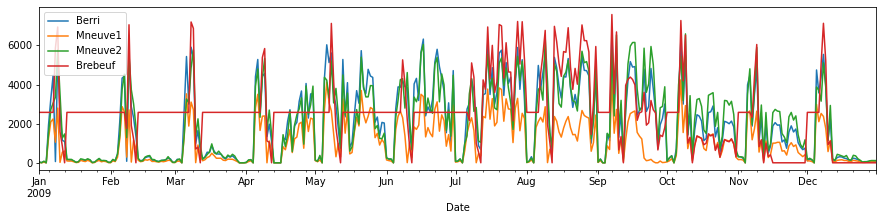

In [64]:
# Graficar usando plot, se grafican las variables numéricas, donde el eje X corresponde al índice con las fechas
d.plot(figsize=(15,3))

<AxesSubplot:xlabel='Date'>

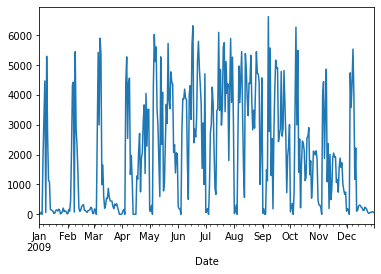

In [65]:
# Graficas sólo una columna (Berri)
d.Berri.plot()

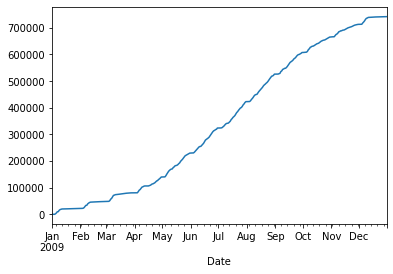

In [ ]:
# Graficas la columna Berri de forma suma acumulada
d.Berri.cumsum().plot()

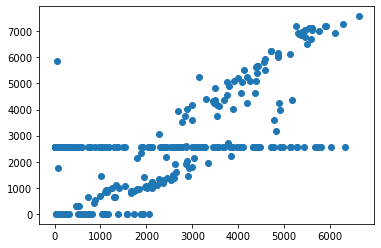

In [66]:
# Graficar puntos para datos de dos columnas
plt.scatter(d.Berri, d.Brebeuf)

array([[<AxesSubplot:xlabel='Berri', ylabel='Berri'>,
        <AxesSubplot:xlabel='Mneuve1', ylabel='Berri'>,
        <AxesSubplot:xlabel='Mneuve2', ylabel='Berri'>,
        <AxesSubplot:xlabel='Brebeuf', ylabel='Berri'>],
       [<AxesSubplot:xlabel='Berri', ylabel='Mneuve1'>,
        <AxesSubplot:xlabel='Mneuve1', ylabel='Mneuve1'>,
        <AxesSubplot:xlabel='Mneuve2', ylabel='Mneuve1'>,
        <AxesSubplot:xlabel='Brebeuf', ylabel='Mneuve1'>],
       [<AxesSubplot:xlabel='Berri', ylabel='Mneuve2'>,
        <AxesSubplot:xlabel='Mneuve1', ylabel='Mneuve2'>,
        <AxesSubplot:xlabel='Mneuve2', ylabel='Mneuve2'>,
        <AxesSubplot:xlabel='Brebeuf', ylabel='Mneuve2'>],
       [<AxesSubplot:xlabel='Berri', ylabel='Brebeuf'>,
        <AxesSubplot:xlabel='Mneuve1', ylabel='Brebeuf'>,
        <AxesSubplot:xlabel='Mneuve2', ylabel='Brebeuf'>,
        <AxesSubplot:xlabel='Brebeuf', ylabel='Brebeuf'>]], dtype=object)

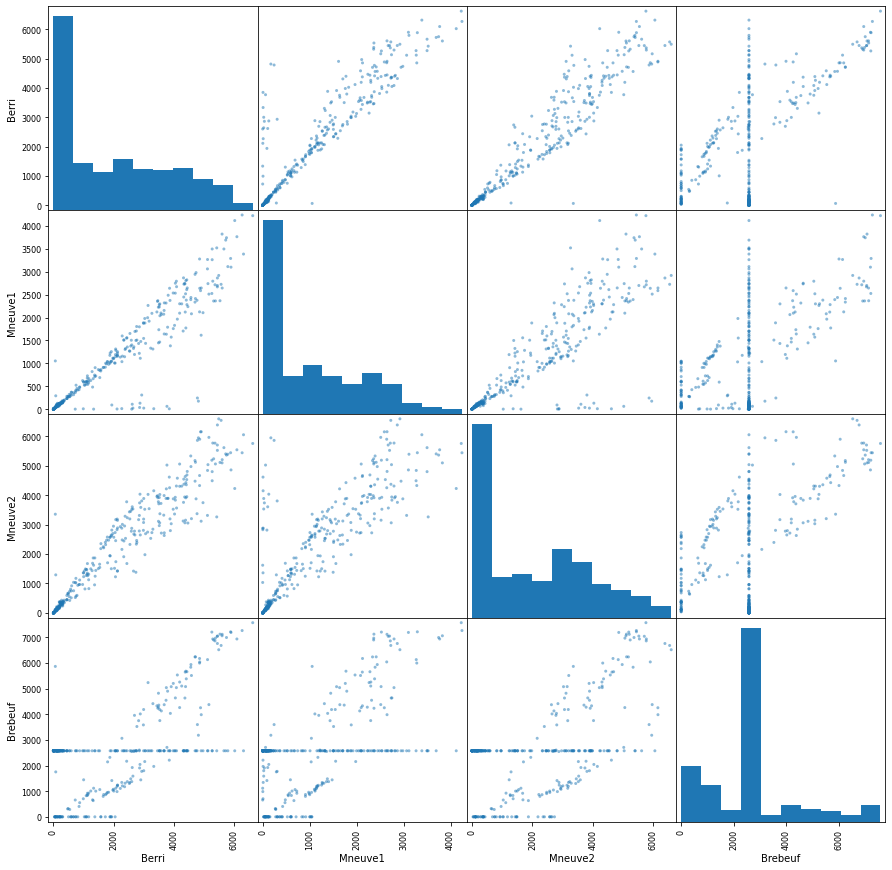

In [67]:
# Graficar puntos todas las columnas contra todas, la diagonal principal corresponde al histograma
pd.plotting.scatter_matrix(d, figsize=(15,15))

## Agrupamiento

In [69]:
# Dado que los índices corresponden a fechas, obtener solamente el mes de la fecha 
for i in d.index:
    print(i.month)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


In [70]:
# Crear nueva columna con el mes, que se extrae de los indices
d["month"] = [i.month for i in d.index]
d.head(100)

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-01-01,29,20,35,2576.359551,1
2009-01-02,14,2,2,2576.359551,1
2009-01-03,67,30,80,2576.359551,1
2009-01-04,0,0,0,2576.359551,1
2009-01-05,1925,1256,1501,2576.359551,1
...,...,...,...,...,...
2009-04-06,5278,3499,4795,2576.359551,4
2009-04-07,2544,1653,2325,2576.359551,4
2009-04-08,4417,2382,4350,5384.000000,4


In [71]:
# Agrupar por el mes (columna creada), los valores máximos
d.groupby("month").max()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,5298,2796,5765,6939.0
2,5451,2868,5517,7052.0
3,5904,3523,5762,7194.0
4,5278,3499,5327,5837.0
5,6028,4120,5397,7121.0
6,6320,3499,6047,5259.0
7,6100,3825,5536,7219.0
8,5452,2865,6379,7044.0
9,6626,4227,6535,7575.0


In [72]:
# Agrupar por el mes (columna creada), el conteo de datos
d.groupby("month").count()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,31,31,31,31
2,28,28,28,28
3,31,31,31,31
4,30,30,30,30
5,31,31,31,31
6,30,30,30,30
7,31,31,31,31
8,31,31,31,31
9,30,30,30,30
